# Assignment Set 3

*Authors*: Myriam Belkhatir, Salomé Poulain, Shania Sinha

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from scipy.sparse import diags

from importlib import reload

## **3.1**: Eigenmodes of Different Drum Shapes

### **A**: Discretization of the Laplacian

This question is mostly theoretical and does not require any code. However, a visual representation of the matrix is created in the code below.

In [ ]:
# import src.matrix_form_plot
# reload(src.matrix_form_plot)
# from src.matrix_form_plot import plot_matrix_form

# # Discretization of the domain (matrix visualization)
# plot_matrix_form()

### **B**: Eigenmodes of Differently-shaped Drums

In [1]:
import src.eigenmodes
# reload(src.eigenmodes)
from src.eigenmodes import EigenvalueProblem

In [2]:
# Define global parameters
shape_dims_tuple = [
        ('square', [1]),
        ('rectangle', [1, 2]),
        ('circle', [1])
    ]

used_solver = 'eig' # Choice explained in methodology of report
n = 30

#### **B.1**: Square with Side = L
#### **B.2**: Rectangle with Sides = L, 2L
#### **B.3**: Circle with Diameter = L

In [ ]:
results = {}
solvers = ['eig', 'eigs', 'eigh', 'eigsh']
# Solve eigenvalue problems and plot eigenmodes
for shape, dims in shape_dims_tuple:
    print(f"\nSolving for shape: {shape.capitalize()}, Dimensions: {dims}")

    problem = EigenvalueProblem(shape, dims, n=n)

    for solver in solvers:
        print(f"Using solver: {solver}")
        eigenvals, eigenvecs, elapsed = problem.solve_eigen_problem(solver=solver, k=9)

        # Store results
        key = f"{shape}_{solver}"
        results[key] = {
            'eigenvalues': eigenvals,
            'eigenvectors': eigenvecs,
            'time': elapsed
        }

        # Plot only for sparse solver to avoid redundancy
        # if solver == 'eig':
        problem.plot_eigenvectors(num_modes=9)

#### **C**: Speed comparison

In [ ]:
# Performance comparison (Dense vs Sparse)
print("\nSolver Performance Comparison:")
for shape, _ in shape_dims_tuple:
    dense_time = results[f"{shape}_eig"]['time']
    sparse_time = results[f"{shape}_eigs"]['time']
    speedup = dense_time / sparse_time
    print(f"{shape.capitalize()}: Dense={dense_time:.4f}s, Sparse={sparse_time:.4f}s, Speedup={speedup:.1f}x")


for shape, _ in shape_dims_tuple:
    dense_time = results[f"{shape}_eigh"]['time']
    sparse_time = results[f"{shape}_eigsh"]['time']
    speedup = dense_time / sparse_time
    print(f"{shape.capitalize()}: Dense={dense_time:.4f}s, Sparse={sparse_time:.4f}s, Speedup={speedup:.1f}x")

#### **D**: Frequency dependence

In [ ]:
# Because eig is used as a solver for more precise results, this might take some time to run but < 10 minutes
n_values = [15, 30, 60]
L_values = np.linspace(0.5, 20.0, 10)
fundamental_freqs = {n: {'square': [], 'rectangle': [], 'circle': []} for n in n_values}

In [ ]:
for n in n_values:
    print(f"\nSolving for n = {n}")

    for L in L_values:
        print(f"Domain size L = {L:.2f}")

        # Square
        sq_prob = EigenvalueProblem('square', [L], n=n)
        eig_sq, _, _ = sq_prob.solve_eigen_problem(solver=used_solver)
        freq_sq = np.sqrt(eig_sq[0]) / (2*np.pi)
        fundamental_freqs[n]['square'].append(freq_sq)

        # Rectangle (2L x L)
        rect_prob = EigenvalueProblem('rectangle', [L, 2*L], n=n)
        eig_rect, _, _ = rect_prob.solve_eigen_problem(solver=used_solver)
        freq_rect = np.sqrt(eig_rect[0]) / (2*np.pi)
        fundamental_freqs[n]['rectangle'].append(freq_rect)

        # Circle (diameter L)
        circ_prob = EigenvalueProblem('circle', [L], n=n)
        eig_circ, _, _ = circ_prob.solve_eigen_problem(solver=used_solver)
        freq_circ = np.sqrt(eig_circ[0]) / (2*np.pi)
        fundamental_freqs[n]['circle'].append(freq_circ)

In [ ]:
# Define line styles for different discretization steps (n-values)
line_styles = {15: '-', 30: '--', 60: ':'} 

# Define colors for different shapes
shape_colors = {'square': 'b', 'rectangle': 'g', 'circle': 'r'}

plt.figure(figsize=(10, 6), dpi=300)
for n in n_values:
    for shape in ['square', 'rectangle', 'circle']:
        plt.plot(
            L_values, fundamental_freqs[n][shape], 
            linestyle=line_styles[n], color=shape_colors[shape], alpha=0.6,
            label=f"{shape.capitalize()} (n={n})"
        )

# Add a reference line f = c/L
c_ref = fundamental_freqs[n_values[0]]['square'][0] * L_values[0] 
plt.plot(L_values, c_ref / L_values, '--k', label='1/L reference')
plt.xlabel('Domain Size L', fontsize=16)
plt.ylabel('Fundamental Frequency (Hz)', fontsize=16)
plt.title('Fundamental Frequency vs. L', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.savefig('results/membrane_eigenmodes/frequency_vs_L.png')
plt.show()

#### **E**: Time-dependent solutions

Solver: eig, Time taken: 0.3453 s, First eigenvalue: 19.7223+0.0000j
Animation successfully saved as results/membrane_eigenmodes/square.gif
Solver: eig, Time taken: 0.3975 s, First eigenvalue: 12.3265+0.0000j
Animation successfully saved as results/membrane_eigenmodes/rectangle.gif


c:\Users\Saloc\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\sparse\_index.py:197: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_arrayXarray(i, j, x)


Solver: eig, Time taken: 0.2155 s, First eigenvalue: 25.5102+0.0000j
Animation successfully saved as results/membrane_eigenmodes/circle.gif


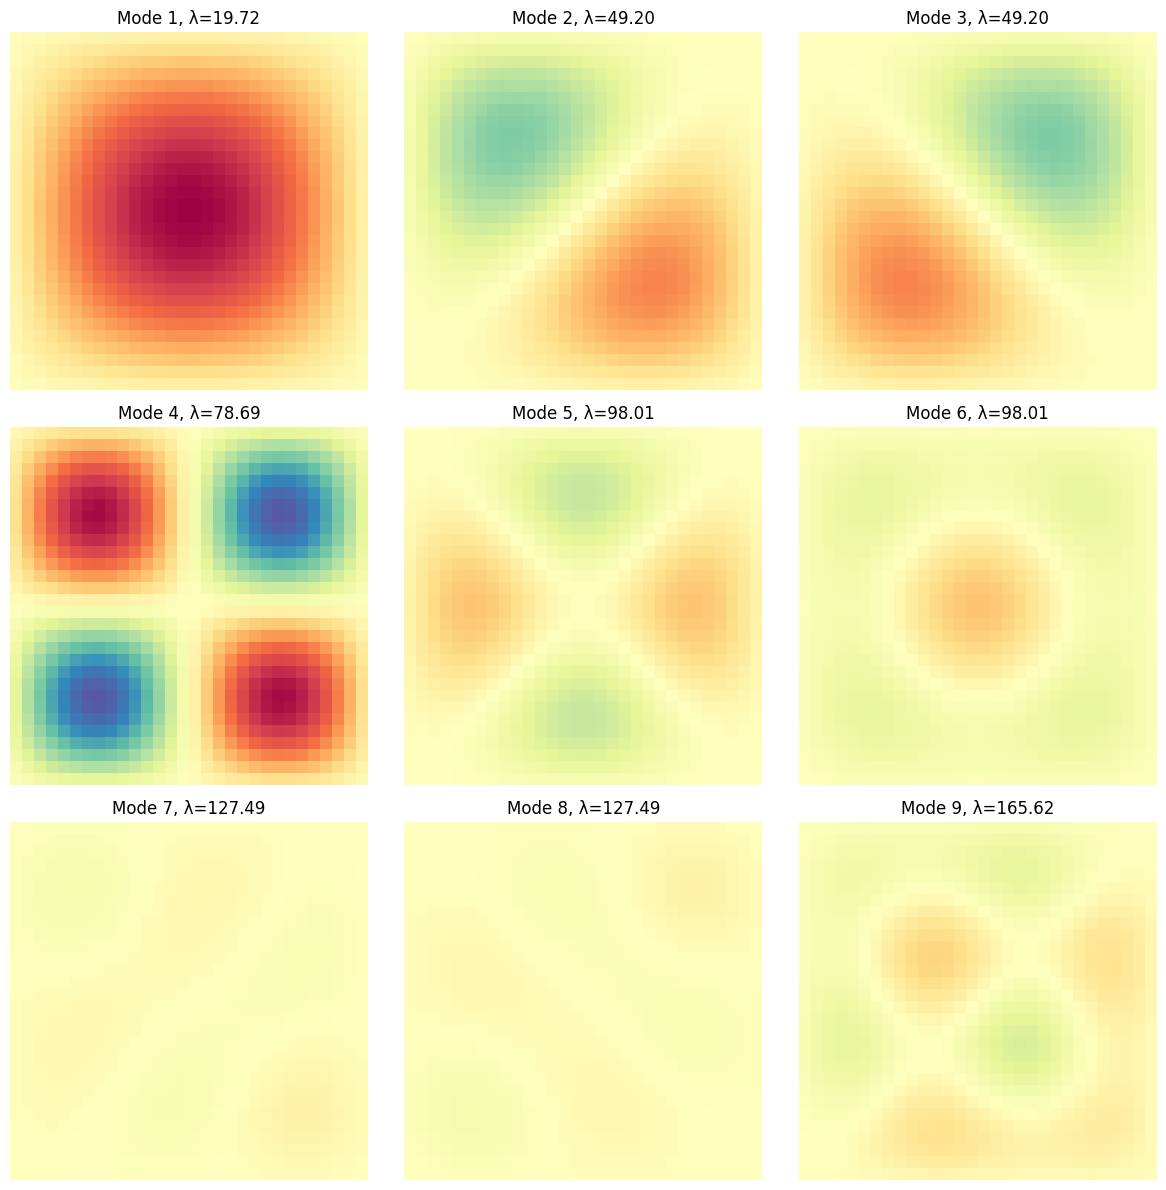

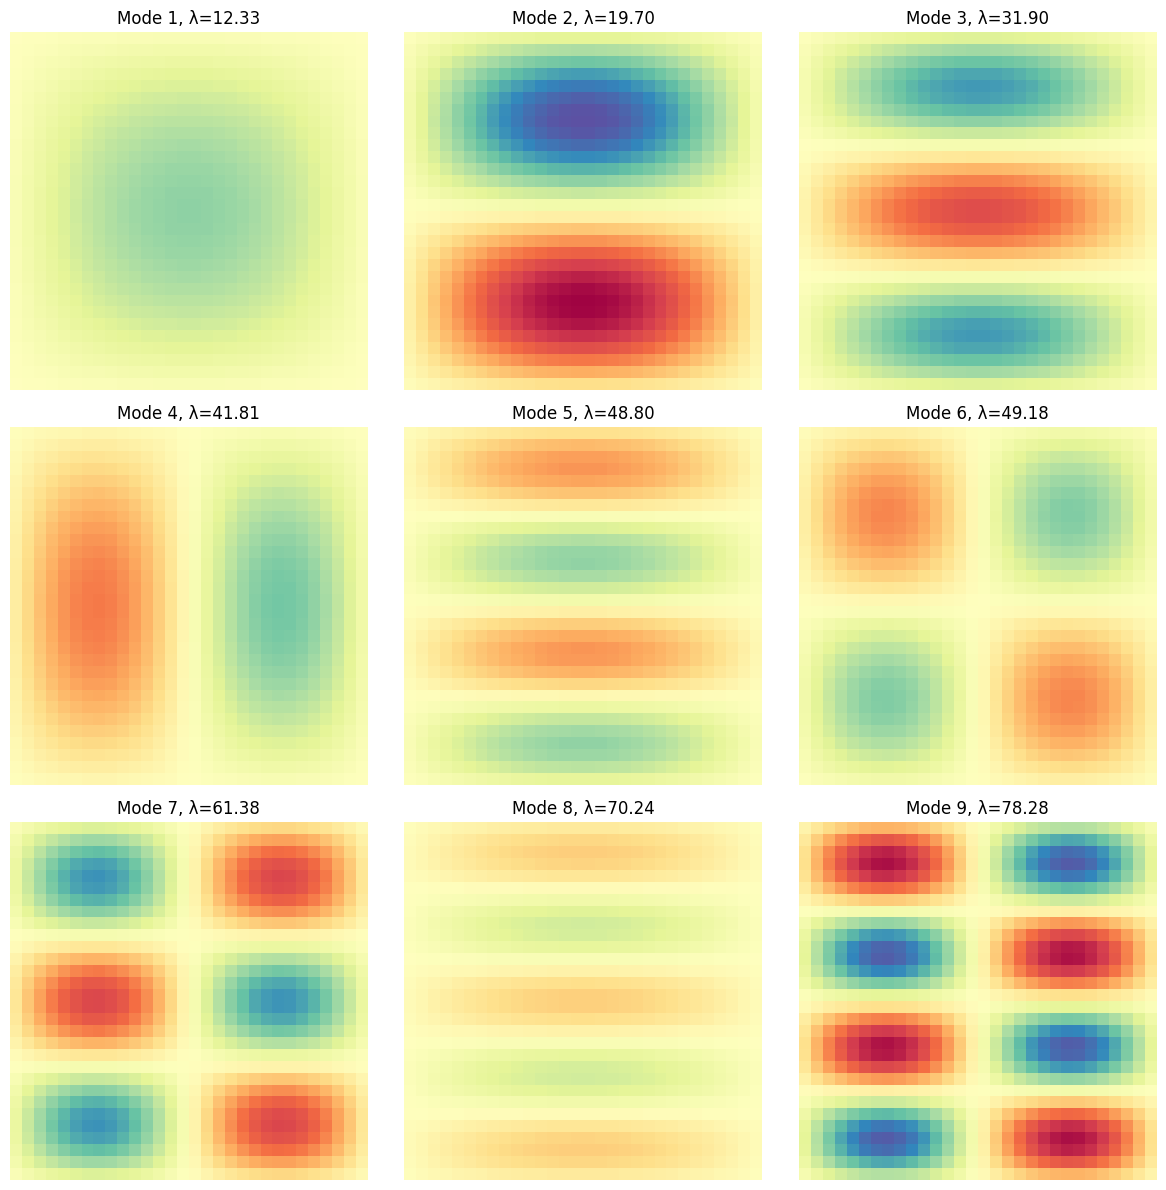

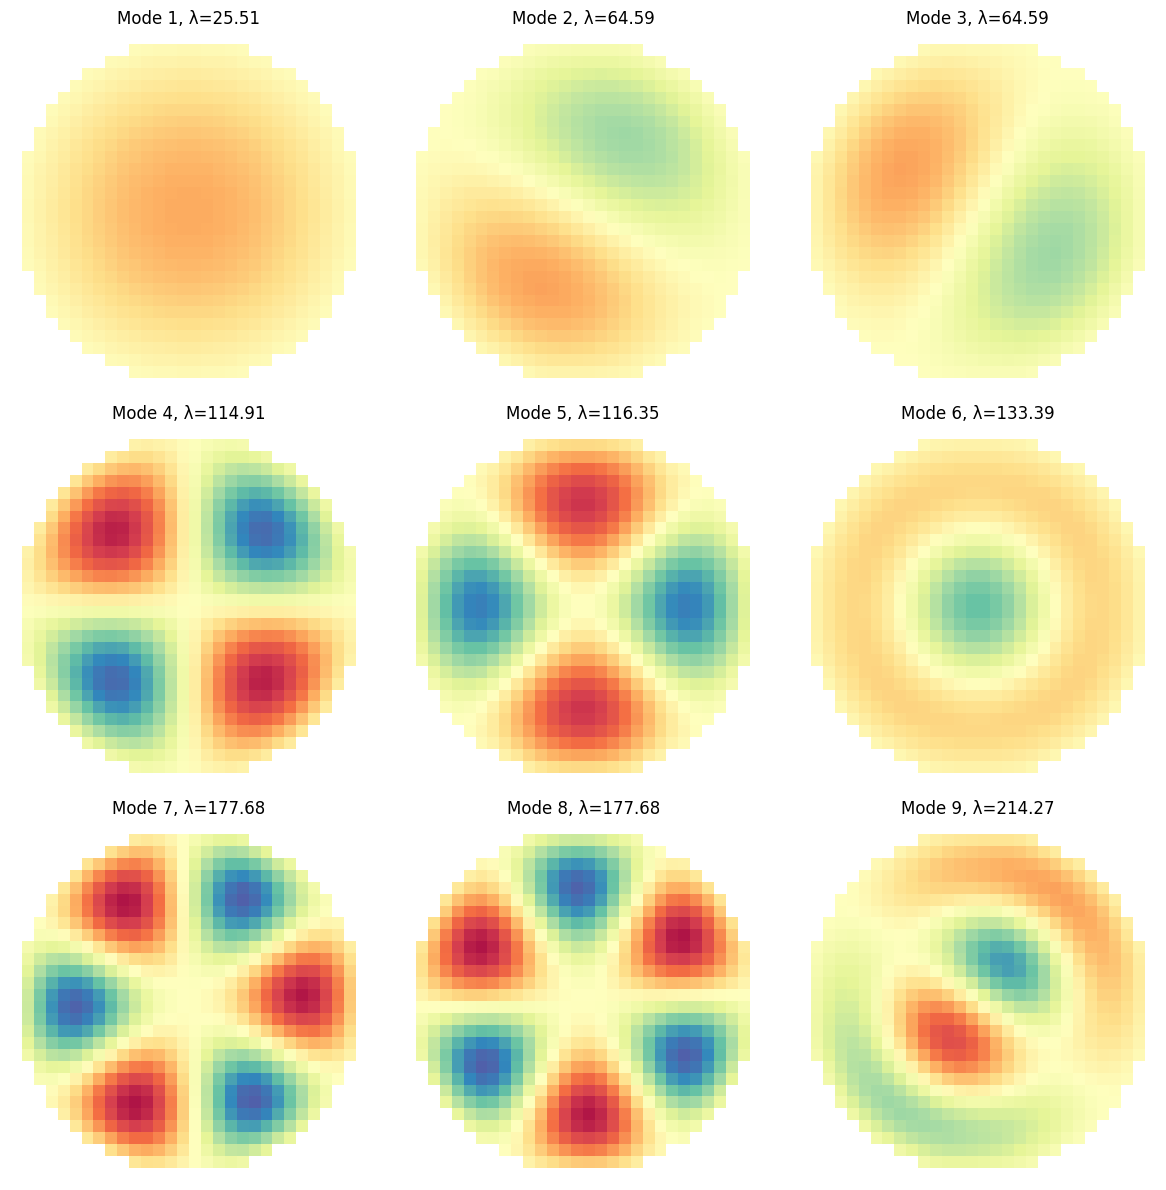

In [3]:
for shape, dims in shape_dims_tuple:
    problem = EigenvalueProblem(shape, dims)
    eigenvalues, eigenvectors, _ = problem.solve_eigen_problem(solver='eig')
    problem.animate_eigenmodes(save_as=shape)

## **3.3**: Leapfrog Integration

In [ ]:
import src.leapfrog
reload(src.leapfrog)
from src.leapfrog import Leapfrog

### **I**: Leapfrog Integration for the Simple Harmonic Oscillator

In [ ]:
solver = Leapfrog(T=30)
solver.solve_leapfrog()
solver.plot_results_leapfrog(savefig=True)

In [ ]:
k_values = [0.5, 1.0, 1.5, 2.0, 5.0]

solver_many_k = Leapfrog(T=10)
solver_many_k.solve_leapfrog()

# Plot many positions graphs
solver_many_k.plot_position_many_k(k_values, savefig=True)

# Plot many velocities graphs
solver_many_k.plot_velocity_many_k(k_values, savefig=True)

### ***Bonus***: Leapfrog vs. Runge-Kutta (Energy Conservation Comparison)

In [ ]:
solver_compare = Leapfrog(T=50, dt=0.01)
solver_compare.plot_compare_methods(savefig=True)

### **J**: Sinusoidal Forcing of Harmonic Oscillator

In [ ]:
solver_forcing = Leapfrog(T=30)

omega_value = 1.2

solver_forcing.solve_leapfrog_with_forcing(omega=omega_value)
solver_forcing.plot_results_leapfrog(savefig=True, with_forcing=True, omega=omega_value)

In [ ]:
solver_forcing.plot_phase_space(savefig=True)